# Installing PyTorch

In [12]:
!pip install torch

# Importing Libs & Packs

In [0]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch import nn, optim

#Data Collection

In [0]:
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

In [0]:
trainset = datasets.FashionMNIST('E:\Academics\ACS\IG- Summer AI\Week 4', download=True, train=True, transform=transform)
valset = datasets.FashionMNIST('E:\Academics\ACS\IG- Summer AI\Week 4', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

#Data Exploration

In [16]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


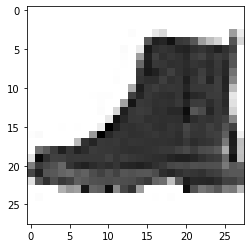

In [17]:
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r')

#Model Building

###Structure of Model

In [33]:
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Dropout(p=0.2),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.2, inplace=False)
  (3): Linear(in_features=128, out_features=64, bias=True)
  (4): ReLU()
  (5): Linear(in_features=64, out_features=10, bias=True)
  (6): LogSoftmax()
)


###Loss Calculation

In [0]:
criterion = nn.CrossEntropyLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logps = model(images) # log probabilities
loss = criterion(logps, labels) # NLL loss

###Backward Propagation

In [0]:
loss.backward()

#Model Training

In [36]:
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
epochs = 20
loss_pt = []
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        
        # Model learns by backpropagating
        loss.backward()
        
        # And optimizing its weights
        optimizer.step()
        
        loss_pt.append(loss.item())
        running_loss += loss.item()
    else:
        print("Epoch {} -> Training loss: {}".format(e, running_loss/len(trainloader)))

Epoch 0 -> Training loss: 0.7763170832827655
Epoch 1 -> Training loss: 0.48224239937786356
Epoch 2 -> Training loss: 0.43287894781083186
Epoch 3 -> Training loss: 0.3982782209478716
Epoch 4 -> Training loss: 0.37673371143813833
Epoch 5 -> Training loss: 0.36016144481167867
Epoch 6 -> Training loss: 0.3458593395600187
Epoch 7 -> Training loss: 0.3368695209672583
Epoch 8 -> Training loss: 0.3277843582159929
Epoch 9 -> Training loss: 0.3166927020194561
Epoch 10 -> Training loss: 0.31055937948892876
Epoch 11 -> Training loss: 0.30578453827704954
Epoch 12 -> Training loss: 0.29639084415553985
Epoch 13 -> Training loss: 0.29207465807194394
Epoch 14 -> Training loss: 0.28307763176527356
Epoch 15 -> Training loss: 0.27947249685300946
Epoch 16 -> Training loss: 0.27475392228282336
Epoch 17 -> Training loss: 0.2678628087814238
Epoch 18 -> Training loss: 0.26524533558565416
Epoch 19 -> Training loss: 0.2610896919915544


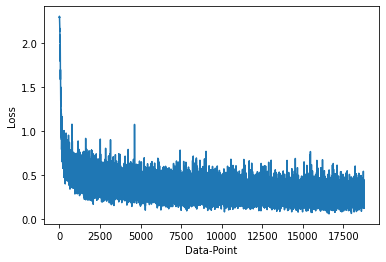

In [37]:
plt.plot(loss_pt)
plt.xlabel('Data-Point')
plt.ylabel('Loss')
plt.show()

#Model Testing

In [38]:
correct_count, all_count = 0, 0
for images,labels in valloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    with torch.no_grad():
        logps = model(img)

    
    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 10000

Model Accuracy = 0.877
